# 2009 vs 2014 : India Election with a 2019 Preview

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import * # For global titile using fig.suptitle

In [2]:
# Reading 2009 candidate dataset
LS09Cand = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2009Candidate.csv")
print(LS09Cand.shape)
LS09Cand.head()

(8070, 14)


,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0


In [3]:
# Reading 2014 candidate dataset
LS14Cand = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2014Candidate.csv")
print(LS14Cand.shape)
LS14Cand.head()

(8794, 14)


,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5


In [4]:
#Merging 2009 & 2014 Candidate datasets on one another
LS0914Cand = pd.concat([LS09Cand,LS14Cand])
print(LS0914Cand.shape)
LS0914Cand.head()

(16864, 14)


,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0


In [5]:
#Checking all political parties abbreviation so that we can make it conscise by including alliance & significant parties
LS0914Cand['Party Abbreviation'].unique()

array(['TDP', 'INC', 'PRAP', 'BJP', 'BSP', 'IND', 'TRS', 'MCPI(S)',
       'PPOI', 'RPI(A)', 'LSP', 'TPPP', 'IJP', 'BSP(AP)', 'BPD', 'SP',
       'RKSP', 'MUL', 'ANC', 'UWF', 'SAP', 'AJBP', 'AIMIM', 'JD(S)',
       'MANP', 'GRIP', 'SJP(R)', 'CPI', 'CPM', 'RJD', 'BSSP', 'BHSASP',
       'JD(U)', 'RPI', 'RDHP', 'RDMP', 'CPI(ML)(L)', 'PBHP', 'RPI(KH)',
       'RPC(S)', 'BCUF', 'BJSH', 'RRS', nan, 'LB', 'AC', 'PPA', 'AUDF',
       'ASDC', 'NCP', 'RWS', 'BOPF', 'AGP', 'RVNP', 'LJP', 'RCPI(R)',
       'RSPS', 'AIMF', 'JMM', 'BVM', 'AIFB', 'SHS', 'LTSD', 'BJKVP',
       'BLPGL', 'BJJD', 'RSP', 'RPP', 'JGP', 'KSVP', 'RKJP', 'RJJM',
       'ABAS', 'ABJS', 'RSWD', 'AD', 'RMEP', 'PTSS', 'LPSP', 'SBSP',
       'SJTP', 'BMF', 'SLP(L)', 'KVSP', 'ABDBM', 'NBNP', 'BHJAP',
       'BSP(K)', 'JVM', 'BSKP', 'LM', 'JPS', 'EKSP', 'BUDM', 'BJKD',
       'JKM', 'PMSP', 'SSD', 'AJSP', 'RLD', 'STPI', 'MAG', 'UGDP', 'SGF',
       'BNJD', 'MJP', 'LSWP', 'VHS', 'NLHP', 'KKJHS', 'NSCP', 'RSP(S)',
       'ABMSD', 'S

In [6]:
#Introducing Alliance column for optimized substitution of Winning Party Abbreviation column
LS0914Cand['Alliance']=LS0914Cand['Party Abbreviation']
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['INC','NCP', 'RJD', 'DMK', 'IUML', 'JMM','JD(s)','KC(M)','RLD','RSP','CMP(J)','KC(J)','PPI','MD'],value='UPA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['BJP','SS', 'LJP', 'SAD', 'RLSP', 'AD','PMK','NPP','AINRC','NPF','RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS','KMDK','IJK','PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT','MPP','KPP','JKPC','KC(T)','BDJS','AGP','JSS','PPA','UDP','HSPDP','PSP','JRS','KVC','PNP','SBSP','KC(N)','PDF','MDPF'],value='NDA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['YSRCP','AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM', 'KEC(M)','SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL', 'JVM','MDMK'],value='Others')
LS0914Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465.0,27.0,Others
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438.0,28.0,CPI(ML)(L)
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366.0,29.0,SAP
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309.0,30.0,NDA


In [7]:
# Winning seats distribution by Major Political Parties & Alliances for 2009 & 2014
SeatsWin = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Alliance','Year'])['Position'].sum().reset_index().pivot(index='Alliance', columns='Year',values='Position').reset_index().fillna(0).sort_values([2014,2009], ascending=False).reset_index(drop = True)
# Removing Index Name
#SeatsWin = pd.DataFrame(data=SeatsWin.values,columns=['Alliance','2009','2014'])
print(SeatsWin['Alliance'].unique())
SeatsWin

['NDA' 'UPA' 'ADMK' 'Others' 'AITC' 'BJD' 'SHS' 'TDP' 'TRS' 'CPM' 'SP'
 'BSP']


Year,Alliance,2009,2014
0,NDA,143.0,300.0
1,UPA,245.0,59.0
2,ADMK,9.0,37.0
3,Others,32.0,34.0
4,AITC,19.0,34.0
5,BJD,14.0,20.0
6,SHS,11.0,18.0
7,TDP,6.0,16.0
8,TRS,2.0,11.0
9,CPM,16.0,9.0


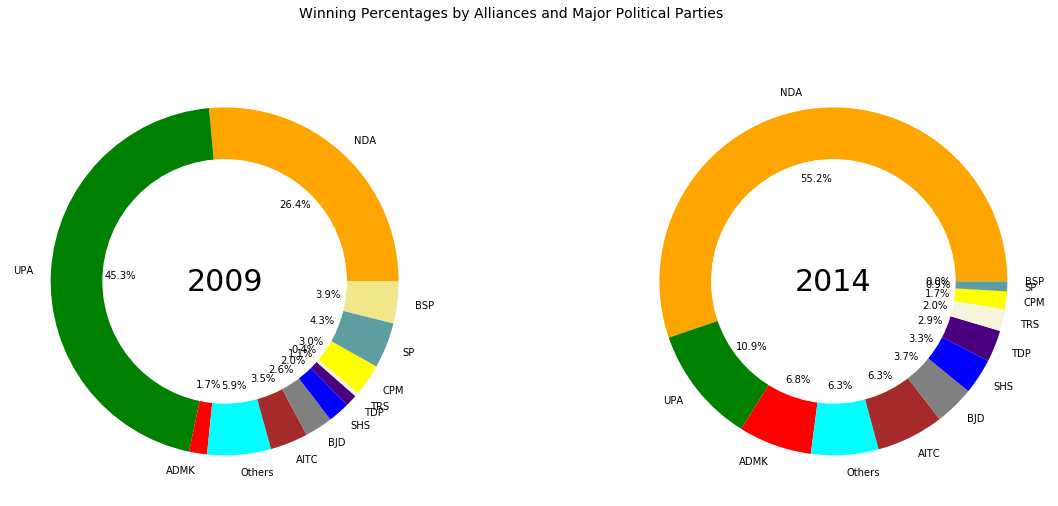

In [8]:
# Seats won by Alliances and Major Political Parties

colors  = ("orange", "green", "red", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow","cadetblue","khaki")
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.pie(SeatsWin[2009], labels=SeatsWin['Alliance'], colors=colors,autopct='%1.1f%%')
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
fig.suptitle("Winning Percentages by Alliances and Major Political Parties", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle1)

label = ax.annotate("2009", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()



#plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.pie(SeatsWin[2014], labels=SeatsWin['Alliance'], colors=colors,autopct='%1.1f%%')
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("2014", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

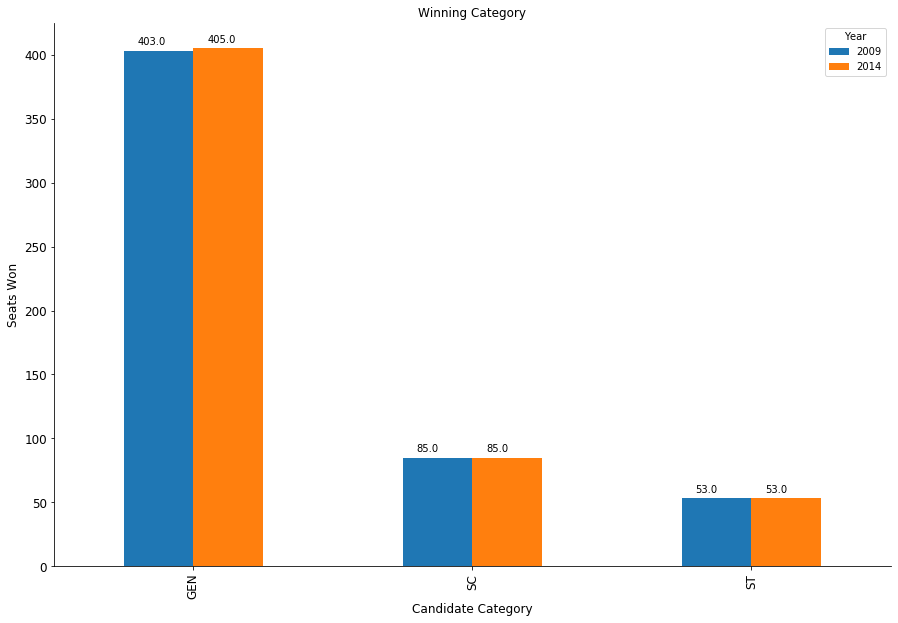

In [9]:
## function to add value label to plot
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
        
CatWin = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Candidate Category','Year'])['Position'].sum().reset_index().pivot(index='Candidate Category', columns='Year',values='Position').reset_index().fillna(0).sort_values([2014,2009], ascending=False).reset_index(drop = True)
#print(CatWin['Candidate Category'].unique())
#CatWin


nx = CatWin.plot(kind='bar', title ="Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0] = 'GEN'
labels[1]= 'SC'
labels[2]='ST'
nx.set_xticklabels(labels)

annot_plot(nx,0.05,5)

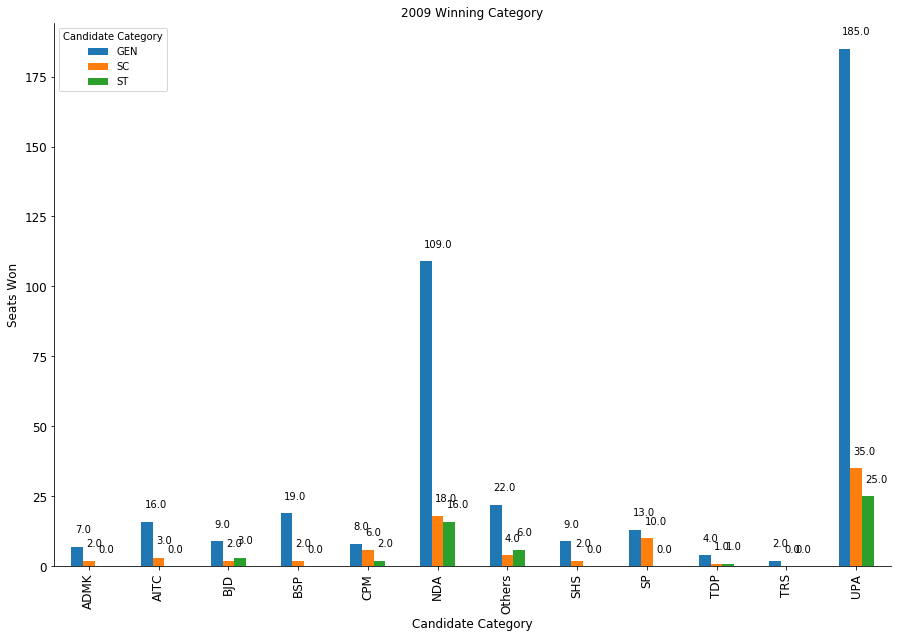

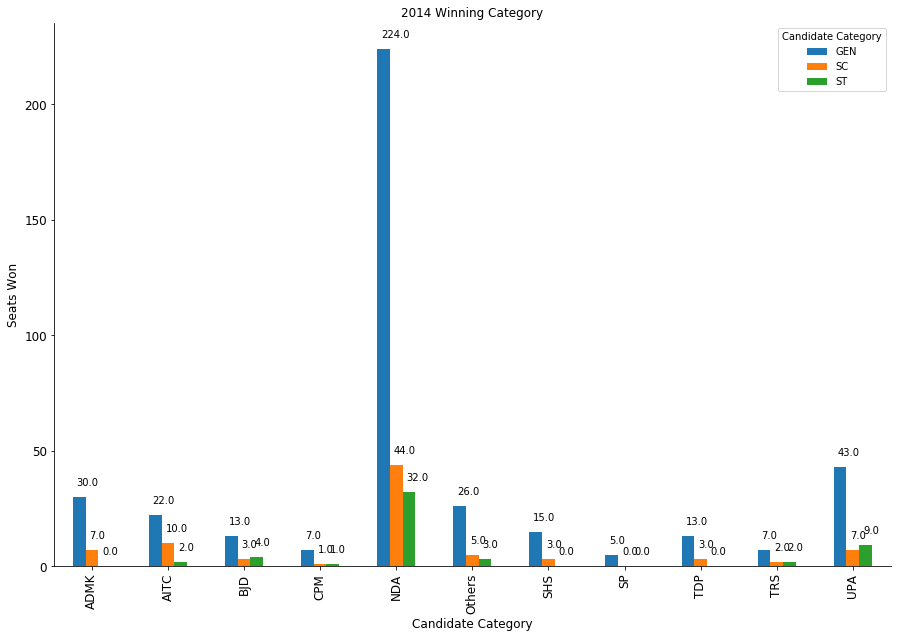

In [10]:
CatAlliance09 = LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)].groupby(['Alliance','Candidate Category'])['Position'].sum().unstack().reset_index().fillna(0)
CatAlliance14 = LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)].groupby(['Alliance','Candidate Category'])['Position'].sum().unstack().reset_index().fillna(0)

nx = CatAlliance09.plot(kind='bar', title ="2009 Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0:11] = CatAlliance09['Alliance']
#labels[1]= 'SC'
#labels[2]='ST'
nx.set_xticklabels(labels)

annot_plot(nx,0.05,5)

nx = CatAlliance14.plot(kind='bar', title ="2014 Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0:11] = CatAlliance14['Alliance']
#labels[1]= 'SC'
#labels[2]='ST'
nx.set_xticklabels(labels)

annot_plot(nx,0.05,5)

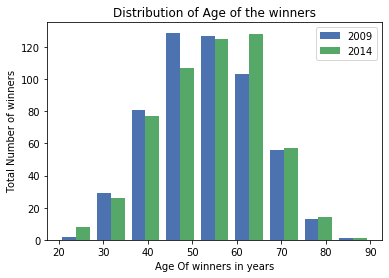

In [11]:
plt.style.use('seaborn-deep')
Age09=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)]['Candidate Age'].tolist()
Age14=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)]['Candidate Age'].tolist()
bins = np.linspace(20, 90, 10)
plt.hist([Age09, Age14], bins, label=['2009', '2014'])
plt.legend(loc='upper right')
plt.xlabel('Age Of winners in years')
plt.ylabel('Total Number of winners')
plt.title('Distribution of Age of the winners')
plt.show()

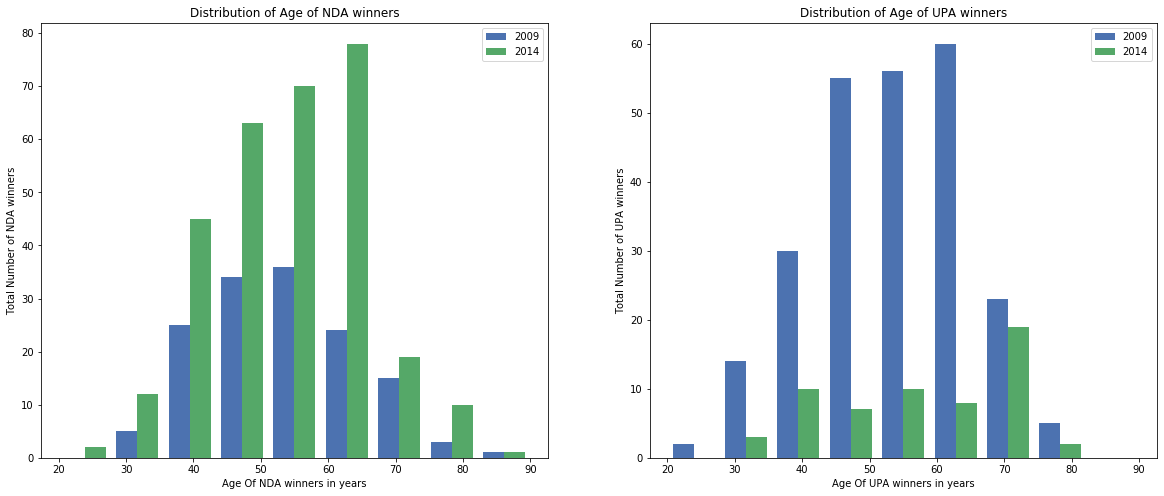

In [12]:
# Age Distribution of Winning Candidates in 2009 & 2014 for NDA & UPA in India Elections

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.style.use('seaborn-deep')

Age09UPA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='UPA')]['Candidate Age'].tolist()
Age14UPA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='UPA')]['Candidate Age'].tolist()
Age09NDA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='NDA')]['Candidate Age'].tolist()
Age14NDA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='NDA')]['Candidate Age'].tolist()

bins = np.linspace(20, 90, 10)
plt.hist([Age09NDA, Age14NDA], bins, label=['2009', '2014'])
plt.legend(loc='upper right')
plt.xlabel('Age Of NDA winners in years')
plt.ylabel('Total Number of NDA winners')
plt.title('Distribution of Age of NDA winners')


plt.subplot(1,2,2)
bins = np.linspace(20, 90, 10)
plt.hist([Age09UPA, Age14UPA], bins, label=['2009', '2014'])
plt.legend(loc='upper right')
plt.xlabel('Age Of UPA winners in years')
plt.ylabel('Total Number of UPA winners')
plt.title('Distribution of Age of UPA winners')

plt.show();

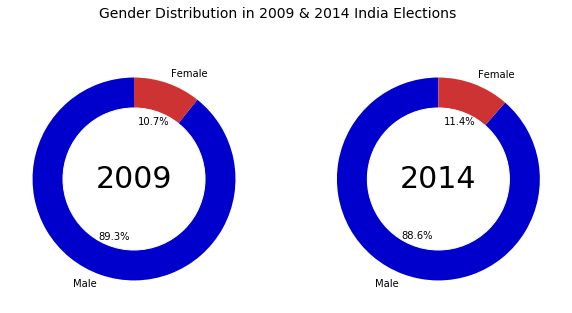

In [13]:
# Gender Distribution of Winning Candidates in 2009 & 2014 India Elections
colors = ['#0000CD','#CD3333']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2009 & 2014 India Elections", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("2009", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("2014", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

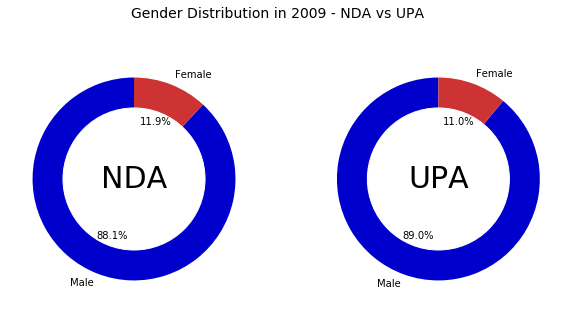

In [14]:
# Gender Distribution of Winning Candidates in 2009 - NDA vs UPA in India Elections
colors = ['#0000CD','#CD3333']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='NDA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2009 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("NDA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='UPA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("UPA", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

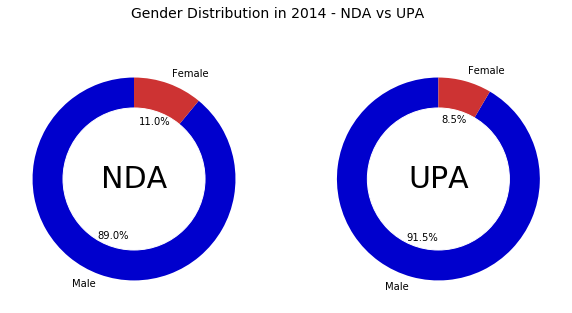

In [15]:
# Gender Distribution of Winning Candidates in 2014 - NDA vs UPA in India Elections

colors = ['#0000CD','#CD3333']
plt.figure(figsize=(10,5))
plt.title('2014')
plt.subplot(1,2,1)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='NDA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2014 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("NDA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='UPA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("UPA", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

In [16]:
# Reading 2009 Electors dataset
LS09Elec = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2009Electors.csv")
print(LS09Elec.shape)
LS09Elec.head()

(543, 8)


,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,TOT_CONTESTANT,POLL PERCENTAGE
0,S01,Andhra Pradesh,1,Adilabad,864165,1131211,9,76.39
1,S01,Andhra Pradesh,2,Peddapalle,905332,1315642,15,68.81
2,S01,Andhra Pradesh,3,Karimnagar,990646,1496211,15,66.21
3,S01,Andhra Pradesh,4,Nizamabad,891508,1333271,12,66.87
4,S01,Andhra Pradesh,5,Zahirabad,1017372,1359566,10,74.83


In [17]:
# Reading 2014 Electors dataset

LS14Elec = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/LS2014Electors.csv")

print(LS09Elec.shape)
LS14Elec.head()

(543, 8)


,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,POLL PERCENTAGE
0,S01,Andhra Pradesh,1,Adilabad,1055593,1386282,76.15
1,S01,Andhra Pradesh,2,Peddapalle,1025194,1425355,71.93
2,S01,Andhra Pradesh,3,Karimnagar,1127225,1550810,72.69
3,S01,Andhra Pradesh,4,Nizamabad,1034032,1496193,69.11
4,S01,Andhra Pradesh,5,Zahirabad,1099784,1445354,76.09


In [18]:
LS09Elec.STATE.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [19]:
LS14Elec.STATE.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [0]:
LS14Elec['STATE']=LS14Elec['STATE'].replace(to_replace=['Odisha'],value='Orissa')
LS14Elec['STATE']=LS14Elec['STATE'].replace(to_replace=['Chhattisgarh'],value='Chattisgarh')

Text(0.5, 1.0, 'Poll Percentage of States 2009 and 2014')

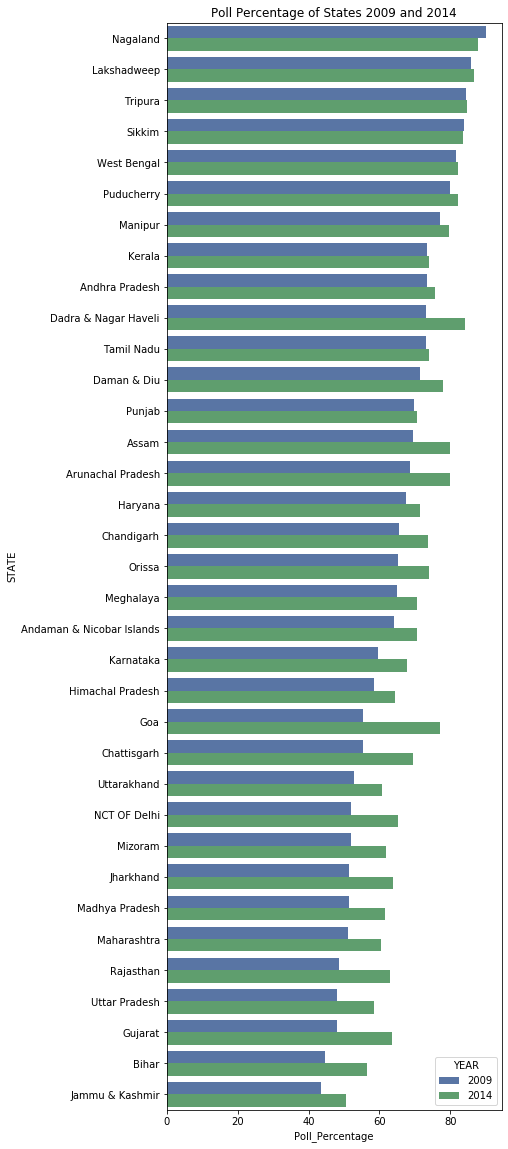

In [21]:
LS09Elec = LS09Elec.groupby('STATE').mean()
LS09 = LS09Elec[['POLL PERCENTAGE']].sort_values('POLL PERCENTAGE',ascending=False).to_dict()
Y09=[2009 for i in range(35)]
S09=list(LS09['POLL PERCENTAGE'].keys())
P09=list(LS09['POLL PERCENTAGE'].values())


LS14Elec = LS14Elec.groupby('STATE').mean()
LS14 = LS14Elec[['POLL PERCENTAGE']].sort_values('POLL PERCENTAGE',ascending=False).to_dict()
Y14=[2014 for i in range(35)]
S14=list(LS14['POLL PERCENTAGE'].keys())
P14=list(LS14['POLL PERCENTAGE'].values())
Data = {'YEAR':Y09+Y14,'STATE':S09+S14,'Poll_Percentage':P09+P14}
DF = pd.DataFrame(data=Data)
ax = plt.subplots(figsize=(6, 20))
sns.barplot(x=DF.Poll_Percentage,y=DF.STATE,hue=DF.YEAR)
plt.title('Poll Percentage of States 2009 and 2014')